In [88]:
pip install statsbomb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [91]:
import statsbomb as sb
import pandas as pd
import numpy as np

In [ ]:
matches=sb.Events

In [ ]:
#matches=sb.matches(competition_id	=55,season_id=43)
#matches
#for statsbombpy only

In [104]:
events=sb.Events(event_id='3795506')
df = events.get_dataframe(event_type = 'shot')
df.head()

,event_type,id,index,period,timestamp,minute,second,possession,possession_team,play_pattern,...,follows_dribble,redirect,one_on_one,open_goal,deflected,start_location_x,start_location_y,end_location_x,end_location_y,end_location_z
0,shot,6605af47-8d44-4f52-9b8d-65598a9c0ef1,71,1,00:01:57.240,1,57,6,England,Regular Play,...,None,None,None,None,None,113.1,30.8,120.0,37.0,1.1
1,shot,43cfe556-8ddb-4555-9b06-916fdc87cec0,209,1,00:07:04.491,7,4,12,Italy,From Free Kick,...,None,None,None,None,None,95.0,54.7,120.0,42.4,4.2
2,shot,86fd78d6-b940-4466-b784-63c027a314da,879,1,00:27:13.854,27,13,46,Italy,From Free Kick,...,None,None,None,None,None,88.1,39.5,120.0,29.2,0.2
3,shot,25b8b5ce-f785-40cf-944c-21927bde4792,1287,1,00:34:39.568,34,39,57,Italy,From Throw In,...,None,None,None,None,None,95.9,46.8,120.0,45.1,0.2
4,shot,89226b23-db53-4e2e-865e-4dda2d1dbaa9,1721,1,00:45:54.658,45,54,74,Italy,From Throw In,...,None,None,None,None,None,106.4,41.6,109.1,42.0,NaN


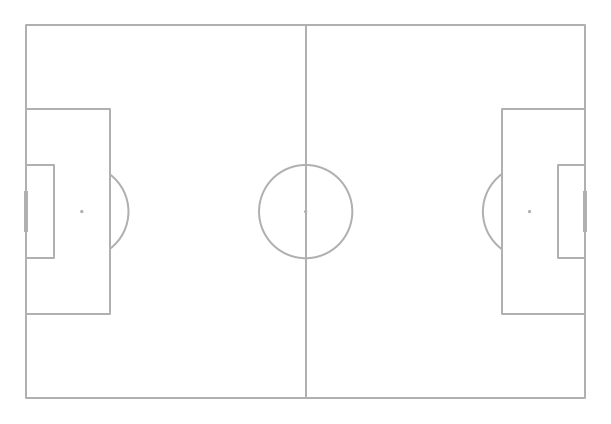

In [35]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch
pitch = Pitch()
fig, ax = pitch.draw(figsize=(12,6))

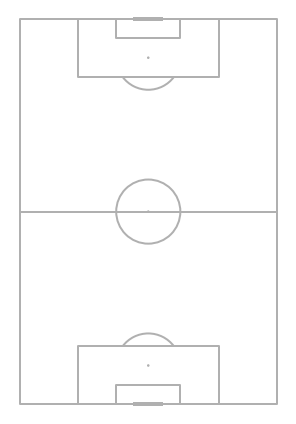

In [34]:
pitch=VerticalPitch()
fig, ax=pitch.draw(figsize=(12,6))

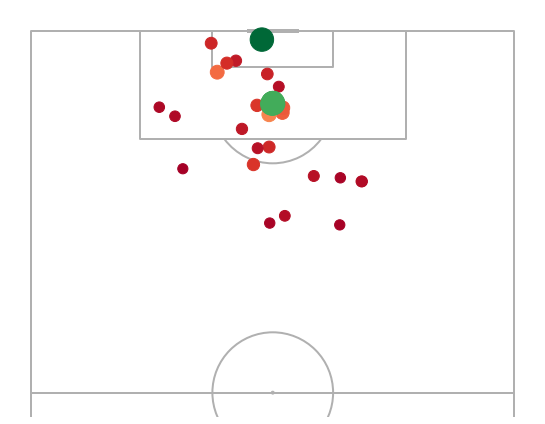

In [111]:
pitch=VerticalPitch(half=True)
fig,ax=pitch.draw(figsize=(12,6))
sc=pitch.scatter(df["start_location_x"],df["start_location_y"],s=df["statsbomb_xg"]*500+100,cmap="RdYlGn",c=df["statsbomb_xg"],ax=ax)


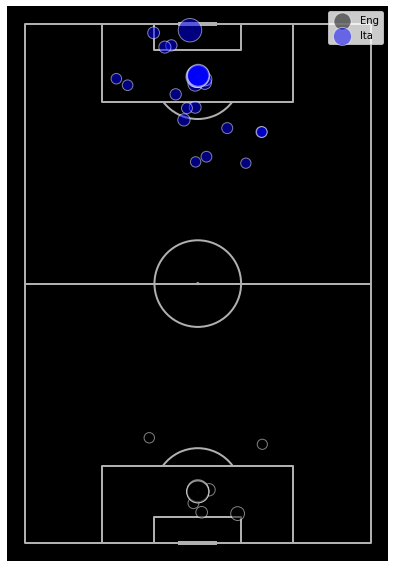

In [127]:

pitch=VerticalPitch(pitch_color='black')
fig,ax=pitch.draw(figsize=(12,8))
eng_color="black"
ita_color="blue"
engdf=df[df["team"]=="England"].copy()
itadf=df[df["team"]=="Italy"].copy()
engdf["start_location_x"]=120-engdf["start_location_x"]
engdf["start_location_y"]=80-engdf["start_location_y"]
engsc=pitch.scatter(engdf["start_location_x"],engdf["start_location_y"],s=engdf["statsbomb_xg"]*500+100,c=eng_color,ax=ax,label="Eng",edgecolor='white',alpha=0.5)
itasc=pitch.scatter(itadf["start_location_x"],itadf["start_location_y"],s=itadf["statsbomb_xg"]*500+100,c=ita_color,ax=ax,label="Ita",edgecolor='white',alpha=0.5)
ax.legend()
